# フィルタ

ここでいうフィルタとは**周波数選択性フィルタ**のことを指す。これまで見てきたように、線形時不変システムは周波数選択性フィルタそのものである。

まずアナログフィルタについて考えて、次にディジタルフィルタについて考える。

In [36]:
import matplotlib.pylab as plt
import numpy as np

# アナログフィルタ

- フィルタの近似問題
  - バターワースフィルタ
  - チェビシェフフィルタ
- ハイパスフィルタなどへの変換

## フィルタの近似問題

理想フィルタ、例えば理想低域フィルタは、因果的線形システムでは実現できない。

なぜなら：

- 理想低域通過フィルタ $H(\omega)$ の振幅特性を逆フーリエ変換すると、インパルス応答 $h(t)$ としてsinc波形が得られる。
- sinc波形は―減衰していくとはいえ―無限長なので、いくら時間推移させても（＝周波数特性に直線位相をかけても）、$h(t) \; (t < 0)$ の部分に波形が残る。
- つまり、理想低域フィルタを因果的システムで実現することはできない。

### フィルタの近似と実現

理想フィルタは因果的システムで実現できないので、理想になるべく近いフィルタを目指すことになる。

現実には、因果的線形アナログフィルタは電気回路で実現するので：

- 微分方程式で記述される線形時不変システムでなければならない。
- つまり、伝達関数$H(s)$が実有理関数である必要がある。
- さらに$H(s)$は、安定でなければならない。

つまり、安定な実有理関数 $H(s)$ によって、理想に近いフィルタを近似することになる。これを**フィルタの近似問題**という。

そして最終的な電気回路としてシステムを実現することを、アナログ信号処理システムの実現という。

ローパスフィルタさえ設計できれば、他の種類のフィルタは変換によって作り出せる。

## 有名な近似手法（Butterworth filter & Chebyshev filter）

理想フィルタを有理多項式で近似する手法として最も有名なのが、Butterworth filterとChebyshev filterである。




### Butterworth Filter（バターワースフィルタ）

特徴

- リプルがない
- 次数に関わらず、カットオフ周波数 $\omega_c$ において、$|H_B(\omega_c)=1/\sqrt{2}|$ である。これはほぼ-3dBであるため、**3dBカットオフ周波数**と呼ばれる。

振幅特性は次式で与えられる：

$$|H_B(\omega)|^2 = \frac{1}{1 + (\omega / \omega_c)^{2n}} $$

#### 有理伝達関数を得る

上記の振幅特性を満たす有理伝達関数を得る。

ラプラス変換で記述する：

$$|H_B(s)|^2 = H_B(j\omega)H_B(-j\omega) = \frac{1}{1 + (-1)^n (s/\omega_c)^{2n}} $$

分母の根（つまり極）を求める：

$$1 + (-1)^n (s/\omega_c)^{2n} = 0$$

変形すると：
$$
s^{2n} = -(-1)^n {\omega_c}^{2n}
$$

したがって、この式の根$\lambda_i$は以下の通りである：

$$
\lambda_i = 
\begin{cases}
\omega_c \cdot e^{j \pi (2k + 1) / 2n} & (\text{when n is even}) \\
\omega_c \cdot e^{j \pi k / n} & (\text{when n is odd})
\end{cases}\\
(k = 0, 1, \cdots, 2n+1)
$$

これらの根の位置は下図の通りとなる。

このうち、負の側にあるn個を$H(s)$の極として採用すれば、$H(s)$が安定となる。

このとき安定な伝達関数は：

$$H_B(s) = \frac{1}{\prod_{k=0}^{n-1} (s - \lambda_k)}$$

となる。



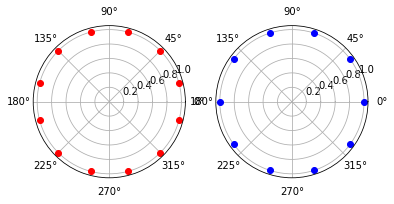

In [35]:
plt.figure()

# nが偶数のとき
n = 6
k = np.arange(0, 2 * n, 1)
poles = np.exp(1j * np.pi * (2 * k + 1) / (2 * n))
ax = plt.subplot(121, projection='polar')
ax.plot(np.angle(poles), np.abs(poles), 'ro')

# nが奇数のとき
n = 5
k = np.arange(0, 2 * n, 1)
poles = np.exp(1j * np.pi * (k / n))
ax = plt.subplot(122, projection='polar')
ax.plot(np.angle(poles), np.abs(poles), 'bo')

### Chebyshev Filter（チェビシェフフィルタ）

特徴

- 通過域の全域にリプルの発生を許す代わりに、急峻な特性が得られる。
- リプルの幅は一定である。これを等リップル特性という。

振幅特性が次式で与えられる：

$$|H_C(s)|^2 = \frac{1}{1 + \epsilon^2 {T_n}^2 (\omega / \omega_c)} $$

$T_n$は、n次のChebyshev多項式と呼ばれるものである。（省略）

$\epsilon$は、リップル変動の幅を表すパラメータである。

この振幅特性を満たす有理伝達関数の一般式はここでは省略する。

## ハイパスフィルタなどへの変換

ローパスフィルタ$H_{LP}(s)$が与えられれば、他の種類のフィルタは変数変換によって求められる。

$$
\begin{eqnarray}
H_{HP}(s) &=& H_{LP}\left( \frac{\omega_c \omega_h}{s} \right) \\
H_{BP}(s) &=& H_{LP}\left( \frac{s^2 + \omega_1 \omega_2}{s} \right) \quad (\omega_c = \omega_2 - \omega_1) \\
H_{BR}(s) &=& H_{LP}\left( \frac{\omega_1 \omega_2 s}{s^2 + \omega_1 \omega_2} \right) \quad (\frac{1}{\omega_c} = \frac{1}{\omega_1} - \frac{1}{\omega_2}) \\
\end{eqnarray}
$$

<Figure size 432x288 with 0 Axes>

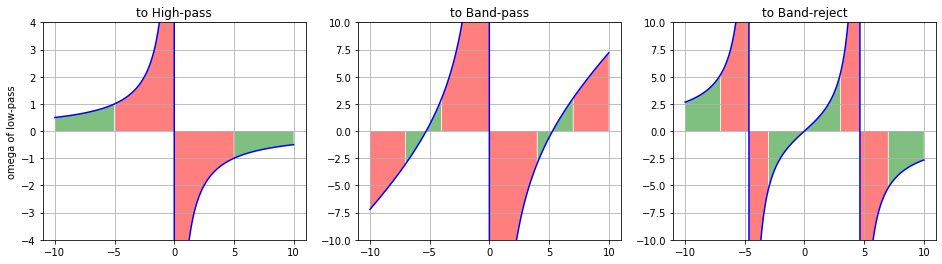

In [110]:
plt.figure()
_, (hp, bp, br) = plt.subplots(ncols=3, figsize=(16,4))
hp.set_ylabel("omega of low-pass")

w = np.linspace(-10, 10, 300)

def plot_fc(ax, orig_w, title, ylim):
    ax.plot(w, orig_w, sty)
    ax.fill_between(w, orig_w, 0, where=np.abs(orig_w) <= wc, facecolor='green', alpha=0.5)
    ax.fill_between(w, orig_w, 0, where=np.abs(orig_w) > wc, facecolor='red', alpha=0.5)
    ax.set_ylim(-ylim, ylim)
    ax.set_title(title)
    ax.grid()

wh = 5
wc = 1
orig_w = wc * wh / -w
plot_fc(hp, orig_w, "to High-pass", 4)

w1 = 4
w2 = 7
wc = w2 - w1
orig_w = (w**2 - w1 * w2) / w
plot_fc(bp, orig_w, "to Band-pass", 10)

w1 = 3
w2 = 7
wc = 1 / (1/w1 - 1/w2)
orig_w = w1 * w2 * w / (- w**2 + w1 * w2)
plot_fc(br, orig_w, "to Band-reject", 10)

# ディジタルフィルタ

→ A/D変換 → ディジタルフィルタ → D/A変換 →

- FIR
  - 特徴
  - 実現方法（窓関数法）
- IIR
  - 特徴
  - 実現方法
    - アナログフィルタからの変換
      - インパルス不変法
      - s-z変換
    - 直接近似（ここではやらない）

## FIRとIIR

既に触れているとおり、離散時間線形時不変システムはFIRシステムとIIRシステムに分けられる。

- インパルス応答の長さが有限のとき、FIRシステムという。FIRシステムの伝達関数は$z^{-1}$の多項式で表現できる。
- インパルス応答が無限の長さをもつとき、IIRシステムという。
  - このIIRシステムは多くの場合、差分方程式で記述される。差分方程式システムの伝達関数は$z^{-1}$の有理多項式である。

FIRシステムは、差分方程式システムの有理多項式に極が存在しない場合（＝出力がフィードバックしないことを意味する）と考えることもできる。

FIRシステムと、IIRシステムそれぞれについて、設計方法や特徴をみていく。

詳しい議論の前に、それぞれの特徴を表にまとめる。

### 特徴まとめ

| | FIR | IIR (差分方程式による) |
|-|-|-|
|インパルス応答|有限長|無限長|
|伝達関数|$z^{-1}$の多項式|$z^{-1}$の有理多項式|　
|急峻さ|△高い次数が必要|◎低い次数で達成できる|　
|直線位相|◎容易に実現できる|△近似的に実現|　
|安定性|◎常に安定|△設計時に考慮する必要がある|　
|設計法|窓関数法|アナログフィルタからの変換（インパルス不変法、双一次変換法）、または直接近似|


## FIRフィルタの設計

1. FIRフィルタで直線位相特性を実現するための条件をみる。
2. そのような条件を満たすFIRフィルタは、窓関数法によって容易に設計できることを見る。

### 直線位相特性

1. 目的とする零位相な周波数特性（離散時間なので周波数特性は周期的）について、その逆DTFT（＝信号）を求める。零位相なのでこの信号は偶関数である。
  - ただしこの信号は因果的でないので、これをそのままインパルス応答として使うことはできない。
2. ここでは、FIRフィルタについて議論しているので、この信号の長さが有限であると仮定しよう。
3. この信号を正の方向へ時間推移させて、$n<0$において信号が$0$になるようにする。
4. このようにして得られた信号は直線位相特性のインパルス応答として使うことができる。なぜなら：
  - 零位相の信号を時間推移させたものは、直線位相となる。
  - $n<0$において信号が$0$なので、因果的である。

### 窓関数法によるFIRフィルタの設計

上記の応用して、理想フィルタを近似的に実現する方法を見る。ここでも直線位相特性が実現できる。

1. 目的とする零位相な周波数特性（離散時間なので周波数特性は周期的）について、その逆DTFT（＝信号）を求める。零位相なのでこの信号は偶関数である。
  - ただしこの信号は因果的でないので、これをそのままインパルス応答として使うことはできない。
2. この信号は無限の長さをもつ。この信号に対して何らかの窓関数をかけて、$-M \leq n \leq M$の範囲で信号を「切り抜く」。
  - 信号に窓関数をかけることは、周波数特性（周期的）を平滑化する（窓関数のスペクトルを畳み込む）ことを意味する。
  - 窓関数が矩形窓の場合は（つまり信号をそのまま切り抜いた場合は）フーリエ級数展開を途中で打ち切ること等価であり、周波数特性にギブス現象による18%リプルが発生する。
  - 実際には、矩形窓以外の適切な窓関数を選択する必要がある。
3. 時間軸方向に$M$サンプル分推移させる。これにより$n<0$において信号が$0$になる。
4. このようにして得られた信号は、直線位相をもったインパルス応答として用いることができる。そしてその周波数特性は、目的の周波数特性を窓関数のスペクトルで平滑化したものである。

### ハイパスフィルタなどへの変換

ローパスフィルタ以外のFIRフィルタは、FIRのローパスフィルタから変換できる。このとき、直線位相特性を保ったまま変換できる。

#### ハイパスフィルタへの変換

離散信号の周波数特性が周期関数であることを利用して、周波数を$\pi$だけ推移させてやればいい。あるいはz平面上で$\pi$だけ回転させればいい。

$$(-1)^n h_{LP}[n] \Longleftrightarrow H_{LP}(e^{-j\pi} \cdot z)$$

これは、ローパスフィルタのインパルス応答を、1サンプルおきに正負逆転させればいいことを意味する。

#### バンドパスフィルタへの変換

ローパスフィルタからローパスフィルタを引けばいい。

$$h_{LP}^{(\omega2)}[n] - h_{LP}^{(\omega1)}[n] \Longleftrightarrow H_{LP}^{(\omega2)}(z) - H_{LP}^{(\omega1)}(z)$$

#### バンドリジェクトフィルタへの変換

ローパスフィルタとハイパスフィルタを加えればいい。

## IIRフィルタの設計

FIRフィルタは完全な直線位相特性を実現でき、安定性も常に満たされる。しかし理想特性に近づけるには高い次数が必要となる。高い次数は計算量の増大を招く。

これに対してIIRフィルタは低い次数で良好な特性を実現できる（なぜなら、インパルス応答が無限長であることは周波数特性における解像度が高いことを意味するからだ）。ただし直線位相は近似的しか実現できず、安定性にも注意を払う必要がある。したがってIIRフィルタの設計はFIRフィルタの設計より難しい。

IIRフィルタの設計法は2つある。

1. アナログフィルタを設計して、それを変換する方法
2. 希望の特性を直接近似する

ここでは 1. について、インパルス不変法と双一次変換法を紹介する。

### インパルス不変法 (Impulse Invariant Method) によるアナログフィルタの変換

（ローパスフィルタとバンドパスフィルタにしか使えない）

アナログフィルタ（有理多項式システム）のインパルス応答$h_a(t)$を$T_s$秒ごとにサンプリングした信号列をインパルス応答$h[n]$とする。この離散インパルス応答をIIRフィルタで近似的に実現する方法がインパルス不変法である。

アナログフィルタの周波数特性がサンプリング定理の範囲内にあれば、サンプリングしたインパルス応答は元の周波数特性の情報を失わない。

つまり、インパルス不変法はローパスフィルタとバンドパスフィルタにしか使えない。ハイパスフィルタやバンドリジェクトフィルタに適用してはならない。

#### 変換方法

アナログフィルタの伝達関数が有理多項式で与えられるとき、次のように部分分数分解できる：

$$H_a(s) = \frac{p_1}{s - \lambda_1} + \frac{p_1}{s - \lambda_2} + \cdots + \frac{p_n}{s - \lambda_n}$$

各養素にインパルス不変法を適用する。

各項の逆ラプラス変換は以下の通り：

$$p_i e^{\lambda_i t} \Longleftrightarrow \frac{p_i}{s - \lambda_i}$$

これをサンプリングしたものをz変換すると：

$$p_i e^{\lambda_i nT_s} \Longleftrightarrow p_i \frac{ z}{z - e^{\lambda_i T_s}}$$

これを足し合わせたものが、z変換の伝達関数となる：

$$ H(z) = K \sum p_i \frac{z}{z - e^{\lambda_i T_s}} $$

$K$は正規化ための係数である。例えば周波数ゼロにおいて$1$となるように（つまり$H(1) = 1$となるように）選べばいい。

#### 安定性

元のアナログフィルタが安定であるとき（すべての極がs平面の負の側にあるとき）、インパルス不変法によって作られたディジタルフィルタも安定である（すべての極がz平面の単位円の内側にある）。

これは先の変換過程をみればわかる。アナログフィルタのs平面における極$\lambda_i$は、変換後のディジタルフィルタのz平面において極$e^{\lambda_i T_s}$となる。


### 双一次変換法 (Bilinear Transformation) によるアナログフィルタの変換

$s$と$z$とのあいだの変換式を定めて、アナログフィルタの伝達関数をディジタルフィルタの伝達関数に変換する。

有理関数を有理関数に変換したいので $z = e^{sT_s}$ の関係は使えない。以下の変換式を使う。

$$s = \frac{2}{T_s} \cdot \frac{1 - z^{-1}}{1 + z^{-1}} \quad \text{つまり} \quad
z = \frac{1 + T_s s / 2}{1 - T_s s / 2}$$

$s$平面上の点は、以下のように$z$平面にマッピングされる。

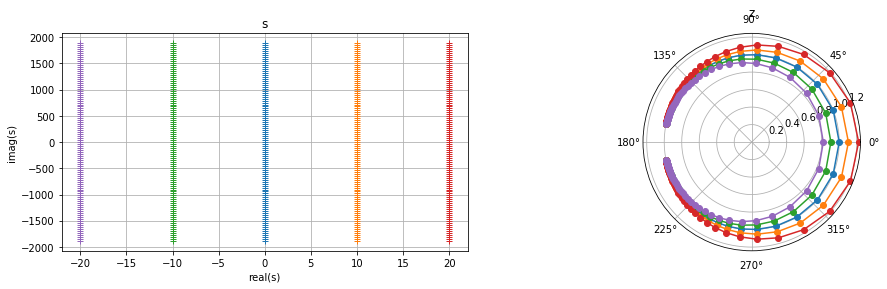

In [157]:
# 双一次変換における s と z の関係
Ts = 1 / 100
w = np.linspace(-6 / Ts * np.pi, 6 / Ts * np.pi, 101)

plt.figure(figsize=(16,4))
ax_s = plt.subplot(121)
ax_z = plt.subplot(122, projection="polar")
ax_s.set_title("s")
ax_s.set_xlabel("real(s)")
ax_s.set_ylabel("imag(s)")
ax_z.set_title("z")
ax_s.grid()

for r in [0, 10, -10, 20, -20]:
    s = r + 1j * w
    z = (1 + Ts * s / 2) / (1 - Ts * s / 2)
    ax_s.plot(np.real(s), np.imag(s), '+')
    ax_z.plot(np.angle(z), np.abs(z), 'o-')

周波数特性の関係は以下の通りなので：

$$
\begin{eqnarray}
e^{j\Omega} &=& \frac{1 + T_s j \omega / 2}{1 - T_s j \omega / 2} \\
            &=& e^{2 \tan^{-1}(T_s \omega / 2)}
\end{eqnarray}
$$

つまり$\Omega$と$\omega$の関係は次式の通りである：

$$\omega = \frac{2}{T_s} \tan \frac{\Omega}{2}$$

求めるカットオフ周波数 $\Omega_c$ から $\omega_c$ を求めて、カットオフ周波数$\omega_c$のアナログフィルタを設計し、それを双一次変換すれば、ディジタルフィルタが得られる。